# RNN_3_emotion

- 전처리 진행하지 않은 ver.
- 긍정, 부정, 중립 3개의 감정 범주로 진행
   - 긍정 : 기존 행복 + 네이버 영화 리뷰 'https://github.com/e9t/nsmc'
   - 부정 : 기존 공포, 혐오, 슬픔, 놀람 + 네이버 영화 리뷰 'https://github.com/e9t/nsmc'
   - 중립 : 연속적 대화 데이터셋
<br><br>
- 참고
  - 'SimpleRNN_Test_Code_CPU.ipynb'  
  - https://wikidocs.net/22894 
  - https://katie0809.github.io/2020/02/17/ai-study4/ 





> ## 1. 전처리 패키지(Khaiii) Import

In [ ]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [ ]:
!pip install cmake

In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [ ]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [ ]:
!cd /content/build/ && make resource

Built target resource


In [ ]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/restore.key
-- Up-to-date: /usr/local/share/khaiii/hdn2tag.lin
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/conv.5.fil
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/restore.val
-- Up-to-date: /usr/local/share/khaiii/errpatch.tri
-- Up-to-date: /usr/local/share/khaiii/errpatch.val
-- Up-to-date: /usr/local/share/khaiii/restore.one
-- Up-to-date: /usr/local/share/khaiii/conv.2.fil
-- Up-to-date: /usr/loc

In [ ]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [ ]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22883574 sha256=c327a256d9eefa4c4c5c15bb869e1db19b78ea9ed5f1fe4e3048c5e004e1a030
  Stored in directory: /tmp/pip-ephem-wheel-cache-km8hge4u/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

> ## 2. 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nan

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

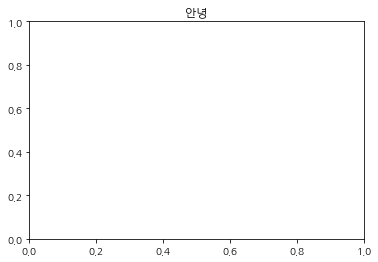

In [ ]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 3. 데이터 불러오기



- dataset_emotion3.xlsx

In [ ]:
import pandas as pd

df = pd.read_excel('dataset_emotion3.xlsx', engine='openpyxl') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64433 entries, 0 to 64432
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    64433 non-null  object 
 1   Emotion     64433 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  3 non-null      object 
 5   Unnamed: 5  4 non-null      float64
 6   Unnamed: 6  3 non-null      object 
dtypes: float64(3), object(4)
memory usage: 3.4+ MB


In [ ]:
df = df.loc[:,['Sentence', 'Emotion']]
df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,부정
1,그냥 내 느낌일뿐겠지?,부정
2,아직너무초기라서 그런거죠?,부정
3,유치원버스 사고 낫다던데,부정
4,근데 원래이런거맞나요,부정


In [ ]:
df['Emotion'] = df['Emotion'].replace(['긍정','부정','중립'],[0,1,2])

In [ ]:
df.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,1
1,그냥 내 느낌일뿐겠지?,1
2,아직너무초기라서 그런거죠?,1
3,유치원버스 사고 낫다던데,1
4,근데 원래이런거맞나요,1


In [ ]:
df.tail()

,Sentence,Emotion
64428,학생은 감상문도 그렇고 표현이 굉장이 거침 없네요.,2
64429,주인공이 하는 짓이 워낙 바보 같아서 이해를 못하겠다. 였죠? 굉장히 인상적이어서 ...,2
64430,"하지만, 역시 이해가 안가요.",2
64431,하하. 그게 솔직한 감상이라면 솔직한 감상이란 거겠죠. 성적에 욕심이 있는 타입의 ...,2
64432,안가고 뭐 하세요?,2


In [ ]:
print('총 샘플 수 : ', len(df))

총 샘플 수 :  64433


In [ ]:
# 중복 없는 문장 확인
df.nunique()

Sentence    60865
Emotion         3
dtype: int64

In [ ]:
# 중복 문장 제거 -> 369문장 삭제 됨
df.drop_duplicates(subset = ['Sentence'], inplace = True)
len(df)

60865

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 64432
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  60865 non-null  object
 1   Emotion   60865 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

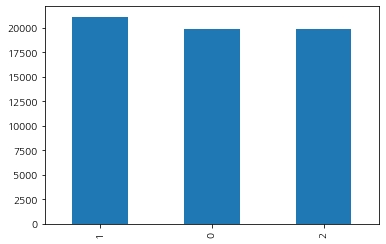

In [ ]:
df['Emotion'].value_counts().plot(kind = 'bar');

> ## 4. Train, Valid, Test Split(6 : 2 : 2)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, 
                                         test_size = 0.2,
                                         shuffle = False,
                                         random_state = 2045)

print(len(train_data))
print(len(test_data))

48692
12173


In [ ]:
train_data, valid_data = train_test_split(train_data, 
                                          test_size = 0.2,
                                          shuffle = False,
                                          random_state = 2045)

print(len(train_data))
print(len(valid_data))

38953
9739


In [ ]:
X_train = train_data['Sentence']
X_valid = valid_data['Sentence']
X_test = test_data['Sentence']
y_train = train_data['Emotion']
y_valid = valid_data['Emotion']
y_test = test_data['Emotion']

In [ ]:
print(X_train)
print(X_valid)
print(X_test)
print(y_train)
print(y_valid)
print(y_test)

0                                 언니 동생으로 부르는게 맞는 일인가요..??
1                                             그냥 내 느낌일뿐겠지?
2                                           아직너무초기라서 그런거죠?
3                                            유치원버스 사고 낫다던데
4                                              근데 원래이런거맞나요
                               ...                        
39427    아쉬운 부분이 있긴 하지만 86년작인걸 감안하고 추억을 떠올리자면 그냥 긍정부정점 ...
39428    개봉했을 당시에도 봤지만 케이블에 할때마다 리모콘을 잡아끄는 매력이 있다 시나리오 ...
39429                        티벳인권착취하더니 이제 영화로 이용해먹네..나쁜놈들.
39430            최고의 배우, 최고의 해병대 정준용 선생님께서 출연하신 영화였다......
39431    한국말 제목으로 묻히기엔 아까운 영화.... 좋은 영화다 ㅠㅠ her 같은 감동이 있다.
Name: Sentence, Length: 38953, dtype: object
39432    대단하다. 전혀 공감하지 못할 내용을 완전히 공감가게 만들었다. 영화의 몰입도, 색...
39433                  다큐감독하고 배우인 두 여자 주인공(친구)사이가 찍어낸 살인영화
39434          기대보다..훨씬 탄탄한 구성과 연기와 감동에 깜짝놀란 두고두고 보고 싶은 영화
39435                                         남자는 어떻게 사는가.
39436     세 명품배우,몰입도 최고의 현출,간결하고 시같은 대사,상처받은 사람들의 아름다운 치유!
           

In [ ]:
print(type(X_train))

<class 'pandas.core.series.Series'>


> ## 5. 카이 토큰화(형태소 분석) & 정수 인코딩 수행

> ### 1) 카이 토큰화

In [ ]:
def khaiii_tokenized(s):
  result = []                         # def 밑에 있어야 문장별로 리스트가 따로 들어간다 
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
X_train_tokenized = X_train.apply(khaiii_tokenized)
X_valid_tokenized = X_valid.apply(khaiii_tokenized)
X_test_tokenized = X_test.apply(khaiii_tokenized)

In [ ]:
X_train_tokenized

0        [언니, 동생, 으로, 부르, 는, 것, 이, 맞, 는, 일, 이, ㄴ가요, ..,...
1                      [그냥, 나, 의, 느낌, 이, ㄹ, 뿐, 이, 겠, 지, ?]
2                           [아직너, 무초기, 이, 라서, 그런, 거, 죠, ?]
3                                    [유치원버스, 사, 고, 낫, 다던데]
4                                   [근데, 원래, 이, 런거, 맞나, 요]
                               ...                        
39427    [아쉽, ㄴ, 부분, 이, 있, 기, ㄴ, 하, 지만, 86, 년, 작, 이, ㄴ,...
39428    [개봉, 하, 였, 을, 당시, 에, 도, 보, 았, 지만, 케이블, 에, 하, ㄹ...
39429    [티벳, 인권착취, 하, 더니, 이제, 영화, 로, 이용, 하, 여, 먹, 네, ....
39430    [최고, 의, 배우, ,, 최고, 의, 해병대, 정준용, 선생, 님, 께서, 출연,...
39431    [한국말, 제목, 으로, 묻히, 기, 엔, 아깝, ㄴ, 영화, ...., 좋, 은,...
Name: Sentence, Length: 38953, dtype: object

In [ ]:
print(type(X_train_tokenized))

<class 'pandas.core.series.Series'>


- Series to List

In [ ]:
X_train_tokenized = X_train_tokenized.tolist()
X_valid_tokenized = X_valid_tokenized.tolist()
X_test_tokenized = X_test_tokenized.tolist()

In [ ]:
print(type(X_train_tokenized))

<class 'list'>


In [ ]:
X_train_tokenized

[['언니',
  '동생',
  '으로',
  '부르',
  '는',
  '것',
  '이',
  '맞',
  '는',
  '일',
  '이',
  'ㄴ가요',
  '..',
  '?',
  '?'],
 ['그냥', '나', '의', '느낌', '이', 'ㄹ', '뿐', '이', '겠', '지', '?'],
 ['아직너', '무초기', '이', '라서', '그런', '거', '죠', '?'],
 ['유치원버스', '사', '고', '낫', '다던데'],
 ['근데', '원래', '이', '런거', '맞나', '요'],
 ['남자', '친구', '가', '떠나', 'ㄹ까', '보', '아요'],
 ['이거', '하', '였', '는데', '허리', '가', '아플수', '도', '있', '나요', '?', ';;'],
 ['내', '가', '불안', '하', '여서', '꾸', '는', '것', '이', 'ㄹ까', '..'],
 ['일주일', '도', '안', '남', '았', '당', '.', '..', 'ㅠ', 'ㅠ'],
 ['약',
  '은',
  '최대한',
  '안',
  '먹',
  '으려고',
  '하',
  '는데',
  '좋',
  '은',
  '음시',
  '있',
  '나요',
  '?',
  '0'],
 ['구직',
  '활동',
  '하',
  '면서',
  '남',
  '는',
  '시간',
  '은',
  '무엇',
  '으로',
  '활용',
  '하',
  '여야',
  '되',
  '지',
  '..'],
 ['괜찮', '은', '분', '같', '아서', '괜히', '조급', '하', '여', '지', '네', '요', 'ㅜ'],
 ['제',
  '가',
  '스타일',
  '을',
  '바꾸',
  '면',
  '더',
  '어색',
  '하',
  '게',
  '만',
  '변하',
  'ㄹ',
  '것',
  '같',
  '아서',
  'ㅠ',
  '0'],
 ['아내',
  '있',
  '으면',
  '여자',
  '있'

> ### 2) 정수인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokenized) 
X_train = tokenizer.texts_to_sequences(X_train_tokenized) # 단어를 숫자값, 인덱스로 변환하여 저장
X_valid = tokenizer.texts_to_sequences(X_valid_tokenized)
X_test = tokenizer.texts_to_sequences(X_test_tokenized)

In [ ]:
print(X_train[:5])
print(X_valid[:5])
print(X_test[:5])

[[679, 869, 54, 597, 4, 25, 2, 186, 4, 79, 2, 249, 28, 9, 9], [130, 20, 27, 413, 2, 18, 361, 2, 45, 15, 9], [12618, 12619, 2, 492, 225, 32, 137, 9], [12620, 185, 6, 473, 3235], [161, 637, 2, 8635, 1685, 58]]
[[304, 1, 8, 3, 925, 1112, 1, 15, 265, 18, 556, 16, 1901, 1112, 7, 24, 157, 22, 8, 3, 60, 27, 1138, 10, 33, 3713, 33, 33, 273, 476, 25, 2, 2519, 1, 159, 10, 551, 87, 2, 8, 19, 11, 10, 280, 768, 4, 225, 60], [1, 6, 273, 2, 5, 152, 166, 998, 482, 160, 423, 891, 7, 565, 12, 76, 5, 1409, 60], [2, 8, 3, 3, 1216, 2634, 1, 5, 2085, 113, 206, 126, 239, 11, 3150, 488, 375, 6145, 19, 6, 82, 13, 60], [174, 4, 111, 24, 106, 955, 3], [308, 2812, 273, 33, 1138, 10, 163, 27, 33, 27995, 1, 6, 39, 49, 13, 1462, 33, 932, 100, 13, 75, 17, 27, 472, 5, 11109, 14]]
[[483, 33, 124, 74, 1, 37, 9], [483, 374, 63, 38, 9], [483, 3, 161, 63, 18, 92, 12233, 2888, 198, 28, 20, 154, 5525, 88, 205, 10, 44, 107, 22, 12, 3], [29, 12, 33, 62, 214, 543, 3, 3, 3, 74, 2, 61, 6, 9], [21, 33, 406, 3, 12233, 28]]


In [ ]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

38953
9739
12173


- 어떤 단어에 어떤 정수가 부여 되었는지 확인
   - 빈도가 높을 수록 낮은 정수 부여
      - 1 ~ 33506번까지 존재

In [ ]:
word_to_index = tokenizer.word_index
len(word_to_index)

33506

In [ ]:
print(word_to_index)

{'하': 1, '이': 2, '.': 3, '는': 4, 'ㄴ': 5, '고': 6, '가': 7, '다': 8, '?': 9, '도': 10, '에': 11, '어': 12, '은': 13, '!': 14, '지': 15, '을': 16, '들': 17, 'ㄹ': 18, '보': 19, '나': 20, '아': 21, '었': 22, '있': 23, '게': 24, '것': 25, '되': 26, '의': 27, '..': 28, '...': 29, '면': 30, '네': 31, '거': 32, ',': 33, '았': 34, '를': 35, 'ㅠ': 36, '여': 37, '는데': 38, '시': 39, '주': 40, '어요': 41, '없': 42, '만': 43, '안': 44, '겠': 45, '좋': 46, 'ㅂ니다': 47, '기': 48, '같': 49, '였': 50, '아니': 51, '로': 52, '말': 53, '으로': 54, '에서': 55, '~': 56, '어서': 57, '요': 58, '너무': 59, '영화': 60, '라': 61, '그': 62, '오': 63, '야': 64, '네요': 65, '잘': 66, 'ㅋ': 67, '저': 68, 'ㄴ다': 69, '니': 70, '수': 71, '않': 72, '정말': 73, '뭐': 74, '사람': 75, '내': 76, 'ㄴ데': 77, '냐': 78, '일': 79, '아서': 80, '알': 81, '싶': 82, 'ㅋㅋ': 83, '습니다': 84, '진짜': 85, '더': 86, '적': 87, '한': 88, '^': 89, '못': 90, '생각': 91, '때': 92, '님': 93, '여서': 94, '너': 95, 'ㅁ': 96, '왜': 97, '좀': 98, '지만': 99, '받': 100, '음': 101, '제': 102, '까지': 103, '…': 104, '아요': 105, '살': 106, '먹': 107, '모르': 108

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('전체 단어 수: ', total_cnt + 1) # 패딩을 위한 토큰인 0번 단어 고려 +1
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt)) # 빈도수 1인 단어 수
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) # 전체 단어 중 빈도수 1회 단어가 72.6%나 된다.
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100) 

전체 단어 수:  33507
등장 빈도가 1번 이하인 희귀 단어의 수: 20889
단어 집합(vocabulary)에서 희귀 단어의 비율: 62.34405778069599
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.6966643483985364


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 33507


> ## 6. Padding

- Padding을 하기 위해 댓글 길이 분포를 살펴보자

댓글 최대 길이 : 132
댓글 평균 길이 : 14.506636


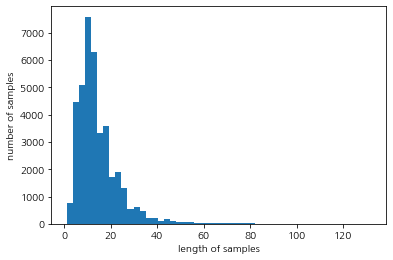

In [ ]:
print('댓글 최대 길이 : %d' %max(len(i) for i in X_train))
print('댓글 평균 길이 : %f' % (sum(map(len, X_train)) / len(X_train)))
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 45에 맞추어 Padding 진행

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 45
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

print('Train 데이터 크기(shape) : ', X_train.shape)
print('Valid 데이터 크기(shape) : ', X_valid.shape)
print('Test 데이터 크기(shape) : ', X_test.shape)

Train 데이터 크기(shape) :  (38953, 45)
Valid 데이터 크기(shape) :  (9739, 45)
Test 데이터 크기(shape) :  (12173, 45)


- y_data One_Hot_Encoding을 해야 한다.

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_valid = to_categorical(y_valid,3)
y_test = to_categorical(y_test,3)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((38953, 45), (38953, 3), (9739, 45), (9739, 3), (12173, 45), (12173, 3))

> ## 7. 단어 임베딩 : Word2Vec 

In [ ]:
train_tokenized = X_train_tokenized + X_valid_tokenized

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = train_tokenized,
                 size = 45,
                 window = 3,
                 min_count = 1,
                 workers = 4,
                 sg = 1)  # sg=1 -> Skip-gram. CBOW보다 성능이 좋다. 

In [ ]:
model.wv.vocab

{'언니': <gensim.models.keyedvectors.Vocab at 0x7f23f97d2f10>,
 '동생': <gensim.models.keyedvectors.Vocab at 0x7f239fc8c0d0>,
 '으로': <gensim.models.keyedvectors.Vocab at 0x7f239fc8c250>,
 '부르': <gensim.models.keyedvectors.Vocab at 0x7f239fc8c290>,
 '는': <gensim.models.keyedvectors.Vocab at 0x7f23a35ea9d0>,
 '것': <gensim.models.keyedvectors.Vocab at 0x7f23e20fad10>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7f23e20fa050>,
 '맞': <gensim.models.keyedvectors.Vocab at 0x7f23e20fa150>,
 '일': <gensim.models.keyedvectors.Vocab at 0x7f239fc8c150>,
 'ㄴ가요': <gensim.models.keyedvectors.Vocab at 0x7f23e20faad0>,
 '..': <gensim.models.keyedvectors.Vocab at 0x7f23e20faa10>,
 '?': <gensim.models.keyedvectors.Vocab at 0x7f23e20fa390>,
 '그냥': <gensim.models.keyedvectors.Vocab at 0x7f23e20fae50>,
 '나': <gensim.models.keyedvectors.Vocab at 0x7f23e20faa50>,
 '의': <gensim.models.keyedvectors.Vocab at 0x7f23e20fab10>,
 '느낌': <gensim.models.keyedvectors.Vocab at 0x7f23f4be6910>,
 'ㄹ': <gensim.models.keyedvecto

In [ ]:
model.wv.vectors.shape

(40330, 45)

In [ ]:
print(model.wv.most_similar('♡'))

[('♡♡', 0.9544663429260254), ('~~~~~', 0.9327487349510193), ('~~~', 0.9309543967247009), ('^^', 0.9301428198814392), ('홧팅', 0.9300544857978821), ('~~', 0.9279869794845581), ('립', 0.9252191781997681), ('♥', 0.925102174282074), ('~~~~', 0.923765242099762), ('!!!', 0.9233434200286865)]


In [ ]:
print(model.wv.most_similar('축하'))

[('축', 0.9302669763565063), ('생일', 0.9187635183334351), ('화이팅', 0.9049298763275146), ('죄송', 0.8983729481697083), ('추', 0.8911152482032776), ('생일축하', 0.8910435438156128), ('송', 0.887916088104248), ('ㅂ니', 0.8869430422782898), ('려요', 0.8802012801170349), ('립', 0.8777308464050293)]


In [ ]:
print(model.wv.most_similar('선수'))

[('팀', 0.8984431624412537), ('어머니', 0.894199788570404), ('멤버', 0.8890382647514343), ('할머니', 0.8878136873245239), ('연기자', 0.8838496208190918), ('학생', 0.8832782506942749), ('시민', 0.8821630477905273), ('영웅', 0.87824547290802), ('야구', 0.8776094317436218), ('강아지', 0.8766282200813293)]


In [ ]:
embedding_dim = 45

embedding_matrix = np.zeros((40331, embedding_dim))

for word, i in word_to_index.items():
  try:
    embedding_vector = model.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

> ## 8. RNN Modeling

> ### 1) Define

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers
from keras import backend as K
import tensorflow as tf

In [ ]:
# 필요할 때 쓰기
K.clear_session() 

Case_5_emotion : 'RNN_HyperParameter.ipynb' 모델 중 좋았던 조합(Case_10) -> Batch_Normalization(Kernel_Regularizer) + Adam(Optimization_method)


In [ ]:
model = Sequential(name = 'RNN_Case_3_emotion')
model.add(Embedding(40331, 45)) 
model.add(SimpleRNN(64))
model.add(layers.BatchNormalization())
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [ ]:
model.summary()

Model: "RNN_Case_3_emotion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 45)          1814895   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                7040      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,822,386
Trainable params: 1,822,258
Non-trainable params: 128
_________________________________________________________________


> ### 2) Compile 

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()





In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max',
                   patience = 1,
                   verbose = 1)

mc = ModelCheckpoint('RNN_model_3_emotion.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

> ### 4) Fit

- Case_3_emotion : Batch + Adam
  - 약 3분

In [ ]:
%%time
history_3_emotion = model.fit(X_train, y_train, 
                             epochs = 60, 
                             batch_size = 100, 
                             validation_data = (X_valid, y_valid),
                             callbacks = [es, mc],
                             verbose = 1)

Epoch 1/60
390/390 [==============================] - 14s 35ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 2.0003 - val_accuracy: 0.7291

Epoch 00001: val_accuracy did not improve from 0.84382
Epoch 2/60
390/390 [==============================] - 14s 35ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 2.4208 - val_accuracy: 0.7062

Epoch 00002: val_accuracy did not improve from 0.84382
Epoch 3/60
390/390 [==============================] - 14s 36ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 1.9135 - val_accuracy: 0.7733

Epoch 00003: val_accuracy did not improve from 0.84382
Epoch 4/60
390/390 [==============================] - 14s 35ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 1.7529 - val_accuracy: 0.7613

Epoch 00004: val_accuracy did not improve from 0.84382
Epoch 5/60
390/390 [==============================] - 14s 35ms/step - loss: 0.0269 - accuracy: 0.9909 - val_loss: 2.3092 - val_accuracy: 0.7234

Epoch 00005: val_accuracy did not improve from 0.84382


> ### 5) Visualization

- Accuaracy & Loss



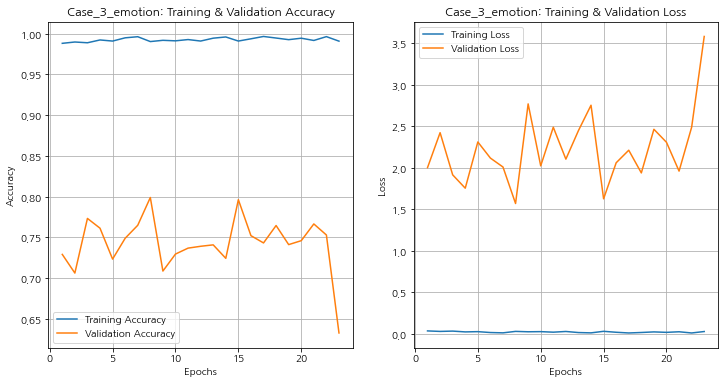

In [ ]:
epochs1 = range(1, len(history_3_emotion.history['val_accuracy']) + 1)
epochs2 = range(1, len(history_3_emotion.history['val_loss']) + 1)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history_3_emotion.history['accuracy'])
plt.plot(epochs1, history_3_emotion.history['val_accuracy'])
plt.title('Case_3_emotion: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs2, history_3_emotion.history['loss'])
plt.plot(epochs2, history_3_emotion.history['val_loss'])
plt.title('Case_3_emotion: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

> ### 6) Predict

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# 0.70

381/381 [==============================] - 1s 4ms/step - loss: 2.3074 - accuracy: 0.6937
Loss = 2.30738
Accuracy = 0.69367


> ## 9. Test



In [ ]:
def sentiment_predict(sentence):
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡!?^;%*><~]', '')
  sentence = khaiii_tokenized(sentence)
  encoded = tokenizer.texts_to_sequences([sentence])
  pad_sentence = pad_sequences(encoded, maxlen=max_len)
  result = model.predict(pad_sentence)
  print(f'긍정: {result[0][0]:.5f}')
  print(f'부정: {result[0][1]:.5f}')
  print(f'중립: {result[0][2]:.5f}')

In [ ]:
# 부정1
sentence = '아니 진짜 너무 무서운데ㅜㅜ'
sentiment_predict(sentence)

긍정: 0.00000
부정: 0.99998
중립: 0.00002


In [ ]:
# 부정2
sentence = '나 내일 시험 떨어지면 어떡하지'
sentiment_predict(sentence)

긍정: 0.00000
부정: 0.99934
중립: 0.00066


In [ ]:
# 부정3
sentence = '진짜..쓰레기 기업이네'
sentiment_predict(sentence)

긍정: 0.00000
부정: 1.00000
중립: 0.00000


In [ ]:
# 부정4 : 왜 긍정으로 분류하지? '아름다운' 때문인가
sentence = '유독 슬프게 다가오는 두 배우의 눈빛과 아름다운 영상미'
sentiment_predict(sentence)

긍정: 0.97988
부정: 0.02011
중립: 0.00002


In [ ]:
# 중립1 : 역시 긍정으로 분류한다.
sentence = '그들의 삶을 있는 그대로 보여준 영화'
sentiment_predict(sentence)

긍정: 0.99837
부정: 0.00000
중립: 0.00162


In [ ]:
# 중립2 
sentence = '내 핸드폰은 갤럭시 기종이다.'
sentiment_predict(sentence)

긍정: 0.00000
부정: 0.00000
중립: 1.00000


In [ ]:
# 중립3
sentence = '그녀는 찬성했어'
sentiment_predict(sentence)

긍정: 0.00000
부정: 0.00000
중립: 1.00000


In [ ]:
# 중립4
sentence = '너네 집 휴지통이 노란색이네?'
sentiment_predict(sentence)

긍정: 0.00000
부정: 0.00000
중립: 1.00000


In [ ]:
# 긍정1 : '너무'만 있으면 잘 분류하고, '정말'만 있으면 반만 분류하고, '정말 너무'로 하면 부정이라고 한다.
sentence = '나 기분이 정말 너무 좋아'
sentiment_predict(sentence)

긍정: 0.08599
부정: 0.85882
중립: 0.05519


In [ ]:
# 긍정2 : 중립으로 분류
sentence = '나돜ㅋㅋㅋㅋㅋㅋㅋ 유야호 하는 부분 보려고 계속 재생중임ㅋㅋㅋㅋㅋ'
sentiment_predict(sentence)

긍정: 0.00046
부정: 0.00000
중립: 0.99954


In [ ]:
# 긍정3 : 중립으로 분류
sentence = '오늘 낮에 강아지랑 같이 소파에 앉아서 햇빛 쐬는데 따뜻하고 노곤해서 좋았어ㅎㅎ'
sentiment_predict(sentence)

긍정: 0.00387
부정: 0.00000
중립: 0.99613


In [ ]:
# 긍정4 : 
sentence = '너 시험 합격했어?! 잘 됐다!'
sentiment_predict(sentence)

긍정: 0.99996
부정: 0.00000
중립: 0.00004


> ## 결론 

- 긍정(0), 부정(1), 중립(2) 세 감정으로 분류했다.
   - 처음으로 정확도가 70%까지 올랐다.
   - 12문장 중 긍정 3/4, 부정 1/4, 중립 1/4을 틀리게 분류했다. 긍정의 분류 정확도가 가장 떨어졌다.  

> ## 10. 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 764567
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/RNN_model_3_emotion.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 840465
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3